<div class="alert alert-block alert-info"><b><h1>kNN Classification</h1></b></div>

<div class="alert alert-block alert-info"><em>Getting the head of the Datasets

<div class="alert alert-block alert-warning"><em>Test Dataset

In [7]:
# Import libraries
import pandas as pd
 
# read the dataset
df_test = pd.read_csv("Airline_Passenger_Satisfaction_Test_Cleaned.csv")
 
    
# Show top 5-records
df_test.head()

,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
4,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied


<div class="alert alert-block alert-warning"><em>Train Dataset

In [8]:
# Import libraries
import pandas as pd
 
# read the dataset
df_train = pd.read_csv("Airline_Passenger_Satisfaction_Train_Cleaned.csv")
 
    
# Show top 5-records
df_train.head()

,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<div class="alert alert-block alert-info"><b><h3>Data Preparation for the kNN Classification Using a Test and Train Set</h3></b></div>

In [9]:
df_train = pd.read_csv("Airline_Passenger_Satisfaction_Train_Cleaned.csv")
df_test = pd.read_csv("Airline_Passenger_Satisfaction_Test_Cleaned.csv")

def conv_cat(data):
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    data['CustomerType'] = data['CustomerType'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
    data['TypeOfTravel'] = data['TypeOfTravel'].map({'Personal Travel':0, 'Business travel':1})
    data['Class'] = data['Class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})
    data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
    data = pd.get_dummies(data)
    data.drop('id',axis=1,inplace=True)
    data.fillna(0,inplace=True)
    return data
df_train = conv_cat(df_train)
df_test = conv_cat(df_test)

<div class="alert alert-block alert-warning"><em>Test Dataset

In [10]:
df_test.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,GateLocation,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
4,0,1,16,1,0,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1


<div class="alert alert-block alert-warning"><em>Train Dataset

In [11]:
df_train.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,GateLocation,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


<div class="alert alert-block alert-info"><b><h3>K-Nearest Neighbors Classification</h3></b></div>

<div class="alert alert-block alert-info"><em>Here, we choose the predictors and the target, and we create test and train sets. Then, we create the kNN Classification model and predict. Then, we get the model precision, accuracy, recall, and F1-score.</em></div>

In [16]:
# split dataset in two parts: feature set and target label 
features = df_train.drop("satisfaction",axis=1)
target = df_train["satisfaction"]

# partition data into training and testing set 
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3)
feature_train.shape, feature_test.shape, target_train.shape, target_test.shape

((68072, 22), (29175, 22), (68072,), (29175,))

In [17]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier
 
# Create a KNN classifier object
model = KNeighborsClassifier(n_neighbors=4)
 
# Train the model using the training dataset
model.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions = model.predict(feature_test)
 
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7414910025706941
Precision: 0.7717929668152551
Recall: 0.5223768018773047
F1-Score: 0.6230507796881247


<div class="alert alert-block alert-info"><b><h3>Prediction

In [20]:
# from sklearn.linear_model import LogisticRegression
import pandas as pd

import pandas
data = {'Gender': [0], 'CustomerType': [1], 'Age': [13], 'TypeOfTravel': [0], 
        'Class': [1], 'FlightDistance': [460], 'InflightWifiservice': [3], 
        'DepartureArrivalTimeCconvenient': [4], 'EaseOfOnlineBooking': [3], 
        'GateLocation': [1], 'FoodAndDrink': [5], 'OnlineBoarding': [3], 
        'SeatComfort': [5], 'InflightEntertainment': [5], 'OnBoardService': [4], 
        'LegRoomService': [3], 'BaggageHandling': [4], 'CheckinService': [4], 
        'InflightService': [5], 'Cleanliness': [5], 'DepartureDelayInMinutes': [25], 
        'ArrivalDelayInMinutes': [18]}
X_test = pd.DataFrame(data)

predictions = model.predict(X_test)
print(predictions)

[0]


<div class="alert alert-block alert-info"><b><h3>Confusion Matrix</h3></b></div>

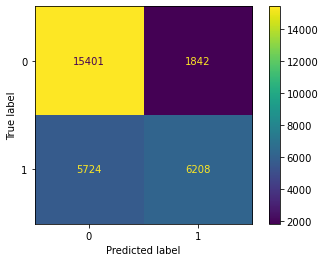

In [12]:
# Import the confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Plot Confusion matrix
plot_confusion_matrix(model, feature_test, target_test, values_format='d')

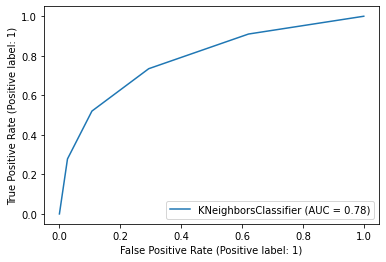

In [13]:
predictions_prob = model.predict_proba(feature_test)[::,1]

# import plot_roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, feature_test, target_test)

In [14]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(target_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.7841180538818154
